In [ ]:
# Install PyWalets (Assuming you meant PyWallets — double-check spelling)
!pip install pywallets

# Install OpenCV
!pip install opencv-python

# Install Seaborn
!pip install seaborn


ERROR: Could not find a version that satisfies the requirement pywallets (from versions: none)
ERROR: No matching distribution found for pywallets


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import cv2
%matplotlib inline

In [ ]:
img= cv2.imread("test_images/sharapova-84bc97653a7b49b73fcb4919fec16a31aff3b806-s800-c85.jpg")
img.shape

(600, 800, 3)

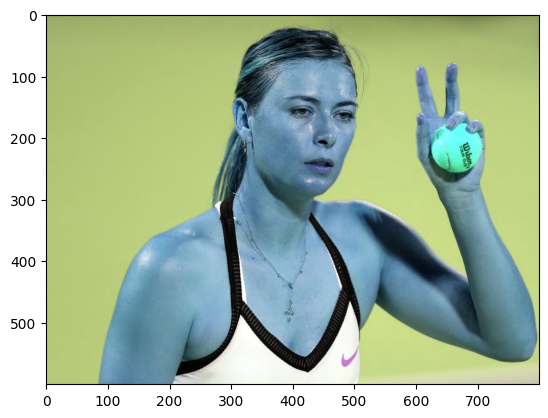

In [ ]:
plt.imshow(img)

In [ ]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(600, 800)

In [ ]:
face_cascade =cv2.CascadeClassifier("opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("opencv/haarcascades/haarcascade_eye.xml")

faces= face_cascade.detectMultiScale(gray, 1.3,5)
faces

array([[351,  82, 200, 200]], dtype=int32)

In [ ]:
(x,y,w,h)= faces[0]
x,y,w,h

(np.int32(351), np.int32(82), np.int32(200), np.int32(200))

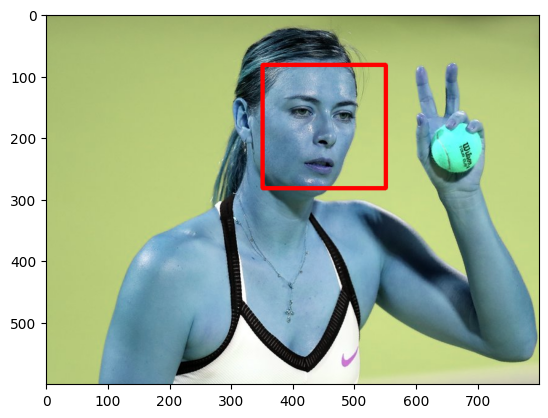

In [ ]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 5)
plt.imshow(face_img)

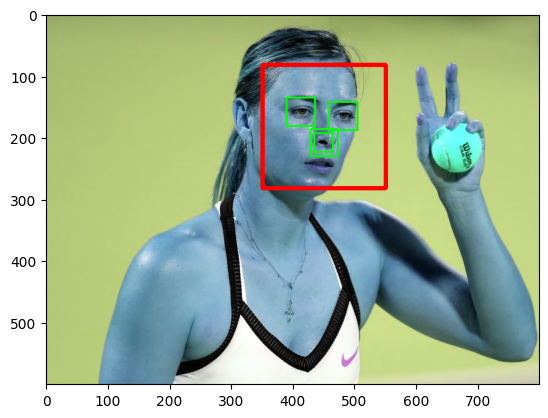

In [ ]:
# cv2.destroyAllWindows()
for (x,y,w,h) in faces:
  face_img = cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = face_img[y:y+h, x:x+w]
  eyes= eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

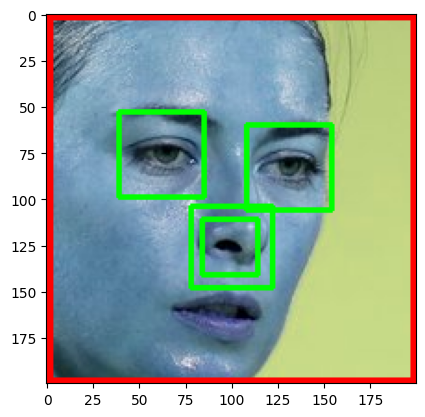

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
  img= cv2.imread(image_path)
  if img is None:
      return None
  gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in faces:
    roi_gray= gray[y:y+h, x:x+w]
    roi_color= img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
      return roi_color


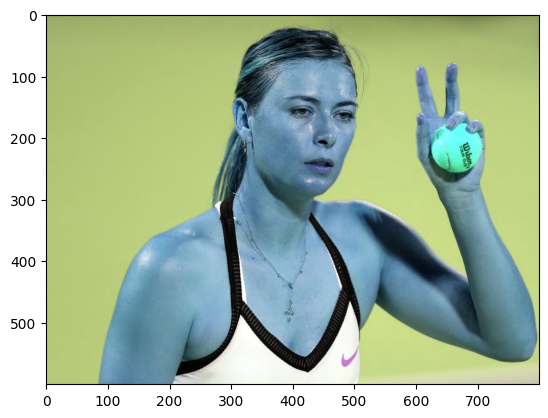

In [ ]:
original_image= cv2.imread("test_images/sharapova-84bc97653a7b49b73fcb4919fec16a31aff3b806-s800-c85.jpg")
plt.imshow(original_image)

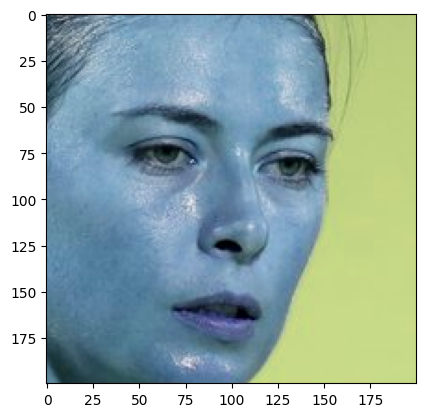

In [ ]:
cropped_image= get_cropped_image_if_2_eyes("test_images/sharapova-84bc97653a7b49b73fcb4919fec16a31aff3b806-s800-c85.jpg")
plt.imshow(cropped_image)

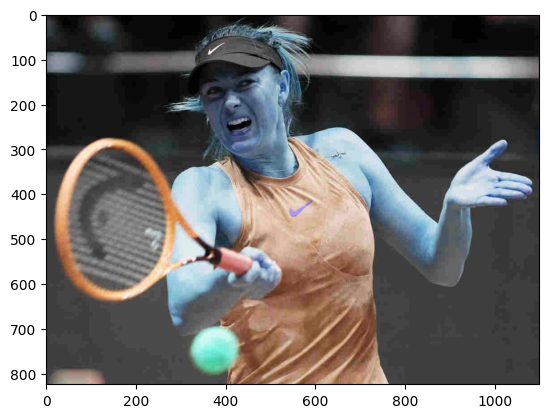

In [ ]:
original_image_obstructed= cv2.imread("test_images/sharapova-power-4ea62a63cb076aed03d3972873cf2740cb4cd6a4-s1100-c15.jpg")
plt.imshow(original_image_obstructed)

In [ ]:
cropped_image_no_2_eyes= get_cropped_image_if_2_eyes("test_images/sharapova-power-4ea62a63cb076aed03d3972873cf2740cb4cd6a4-s1100-c15.jpg")
cropped_image_no_2_eyes

In [ ]:
path_to_data = "dataset"
path_to_cr_data = "dataset/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/drive/MyDrive/dataset/virat_kohli',
 '/content/drive/MyDrive/dataset/roger_federer',
 '/content/drive/MyDrive/dataset/serena_williams',
 '/content/drive/MyDrive/dataset/maria_sharapova',
 '/content/drive/MyDrive/dataset/lionel_messi',
 '/content/drive/MyDrive/dataset/cropped']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if img is None:
            continue
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/drive/MyDrive/dataset/cropped/virat_kohli
Generating cropped images in folder:  /content/drive/MyDrive/dataset/cropped/roger_federer
Generating cropped images in folder:  /content/drive/MyDrive/dataset/cropped/serena_williams
Generating cropped images in folder:  /content/drive/MyDrive/dataset/cropped/maria_sharapova
Generating cropped images in folder:  /content/drive/MyDrive/dataset/cropped/lionel_messi


In [ ]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

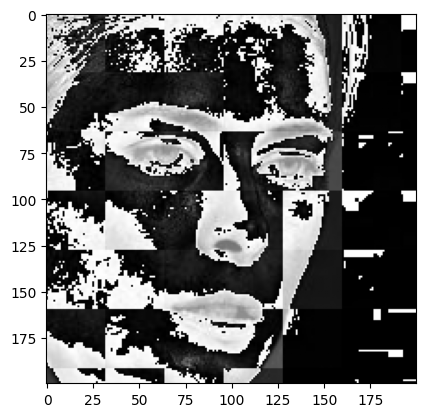

In [ ]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'virat_kohli': ['/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli11.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli12.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli14.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli18.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli15.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli16.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli21.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli22.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli1.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli20.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli19.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli2.png',
  '/content/drive/MyDrive/dataset/cropped/virat_kohli/virat_kohli48.png',
  '/content/drive/MyDrive

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'virat_kohli': 0,
 'roger_federer': 1,
 'serena_williams': 2,
 'maria_sharapova': 3,
 'lionel_messi': 4}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
len(X)

155

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(155, 4096)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test,y_train,y_test= train_test_split(X,y,random_state=0)

pipe= Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel= "rbf", C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

0.8974358974358975

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      1.00      0.92         6
           2       0.67      0.67      0.67         3
           3       1.00      0.77      0.87        13
           4       0.78      1.00      0.88         7

    accuracy                           0.90        39
   macro avg       0.86      0.89      0.87        39
weighted avg       0.91      0.90      0.90        39



In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_score,best_params
0,svm,0.835507,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.638406,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.861594,{'logisticregression__C': 5}


In [ ]:
best_estimators["svm"].score(X_test,y_test)

0.9230769230769231

In [ ]:
best_estimators["random_forest"].score(X_test,y_test)

0.5641025641025641

In [ ]:
best_estimators["logistic_regression"].score(X_test,y_test)

0.9230769230769231

In [ ]:
best_clf= best_estimators["svm"]

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  1,  2,  0,  0],
       [ 0,  1,  1, 11,  0],
       [ 0,  0,  0,  0,  7]])

Text(95.72222222222221, 0.5, 'Truth')

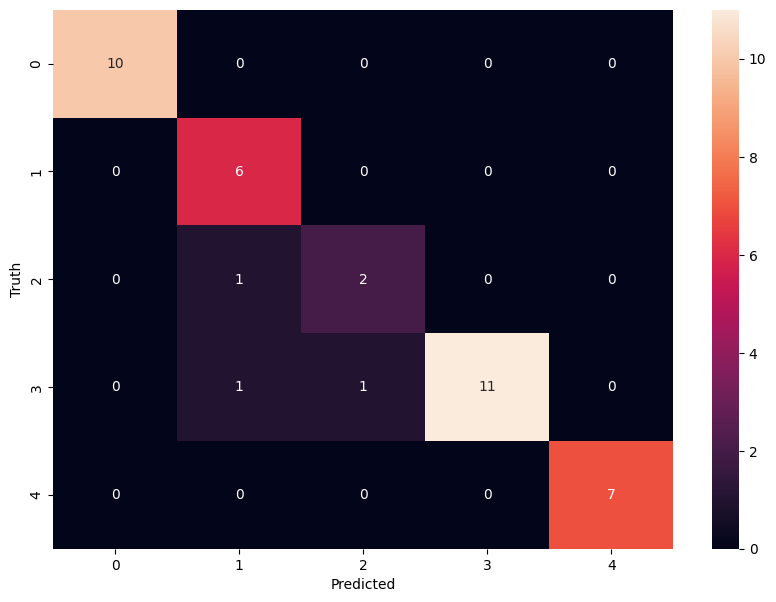

In [ ]:
import seaborn as sns
plt.figure(figsize= (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
!pip install joblib
import joblib
joblib.dump(best_clf, "saved_model.pk1")

['saved_model.pk1']

In [ ]:
import json
with open("class_dictionary.json", "w") as f:
  f.write(json.dumps(class_dict))